## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [38]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from plotnine import *

ha = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
ha.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [39]:
X = ha[["age", "chol"]]
y = ha["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
b0_logreg = logreg.intercept_[0]
b1_logreg = logreg.coef_[0][0]
b2_logreg = logreg.coef_[0][1]

In [52]:
b0_logreg, b1_logreg, b2_logreg

(-3.338641533613324, 0.04386567284143753, 0.0032280573459817674)

In [57]:
logreg_p50 = np.log(0.5 / (1 - 0.5))
(logreg_p50 - b0_logreg - b1_logreg * 55) / b2_logreg

286.8689828224292

In [54]:
# For 90% probability
logreg_p90 = np.log(0.9 / (1 - 0.9))

(logreg_p90 - b0_logreg - b1_logreg * 55) / b2_logreg

967.533649474429

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()


lda.fit(X_train, y_train)

b0_lda = lda.intercept_[0]
b1_lda, b2_lda = lda.coef_[0]

In [55]:
-(b0_lda + b1_lda * 55) / b2_lda

288.9719797667807

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000]}

svc = SVC(kernel='linear')

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_svc = grid_search.best_estimator_

In [56]:
b0_svc = best_svc.intercept_[0]
b1_svc = best_svc.coef_[0][0]
b2_svc = best_svc.coef_[0][1]

(-b0_svc - b1_svc * 55) / b2_svc


250.17467397269547

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

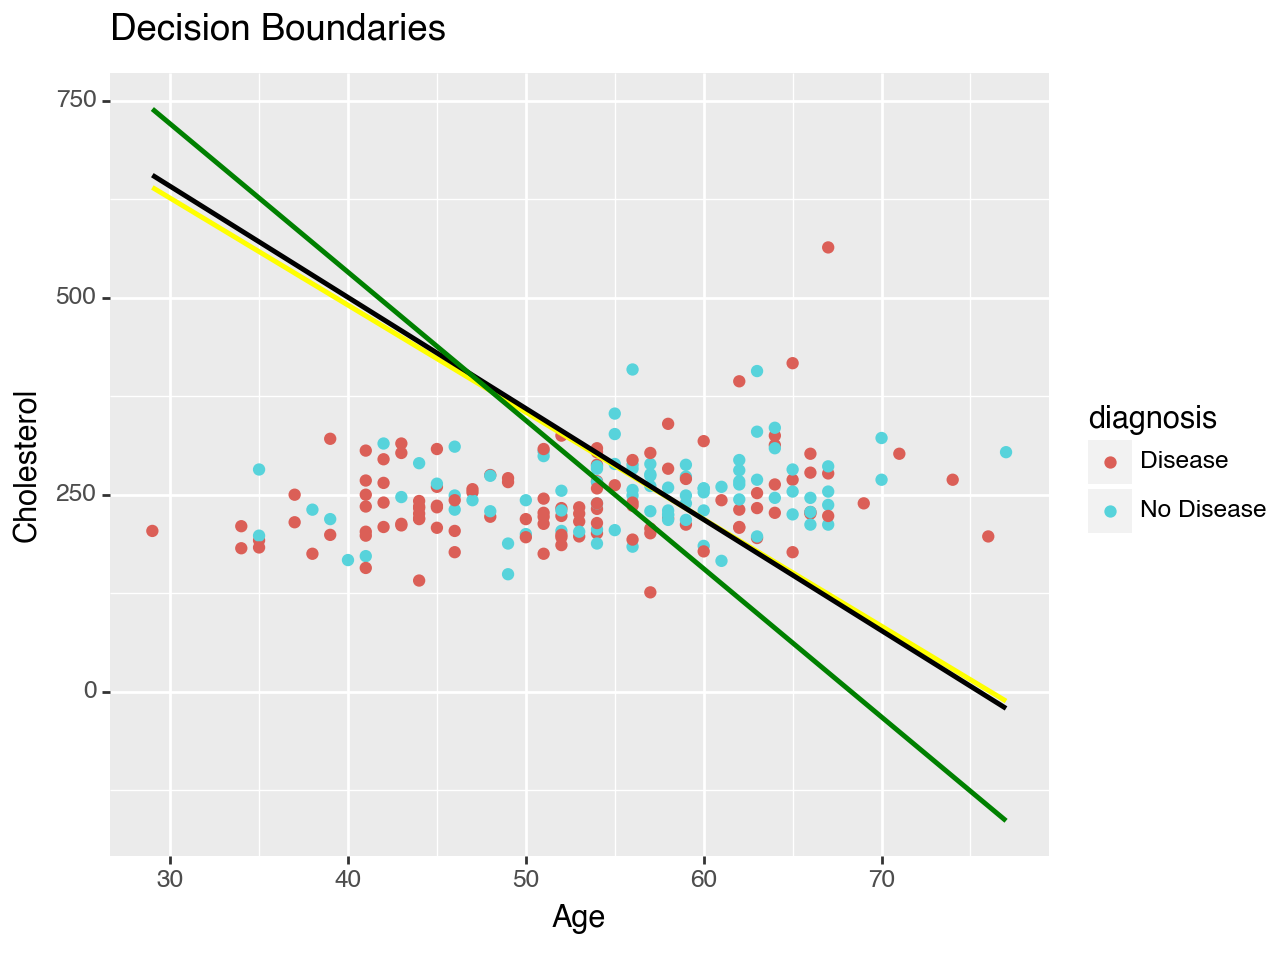

In [65]:
from plotnine import *

# Base scatter plot
plot = (ggplot(ha, aes(x='age', y='chol', color='diagnosis')) +
        geom_point() +
        labs(title='Decision Boundaries', x='Age', y='Cholesterol'))

#GPT Assisted
# Age range for plotting decision boundaries
age_range = np.linspace(ha['age'].min(), ha['age'].max(), 100)

# Decision boundary for Logistic Regression
chol_log = (-b0_logreg - b1_logreg * age_range) / b2_logreg
log_reg_line = pd.DataFrame({'age': age_range, 'chol': chol_log})

# Decision boundary for LDA
chol_lda = (-b0_lda - b1_lda * age_range) / b2_lda
lda_line = pd.DataFrame({'age': age_range, 'chol': chol_lda})

# Decision boundary for SVC
chol_svc = (-b0_svc - b1_svc * age_range) / b2_svc
svc_line = pd.DataFrame({'age': age_range, 'chol': chol_svc})


plot += geom_line(data=log_reg_line, color='yellow', size=1)
plot += geom_line(data=lda_line, color='black', size=1)
plot += geom_line(data=svc_line, color='green', size=1)

print(plot)